In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from collections import namedtuple
import math

In [19]:
BoundingBox = namedtuple('BoundingBox', 'cx cy w h')

In [20]:
def getTightBBox(image):
    alpha = image[:,:,3].astype(bool)
    nonzero_idxs = np.nonzero(alpha)
    left = nonzero_idxs[1].min()
    right = nonzero_idxs[1].max() + 1
    top = nonzero_idxs[0].min()
    bottom = nonzero_idxs[0].max() + 1
    
    w = right - left
    h = bottom - top

    cx = (left + right) / 2.0
    cy = (bottom + top) / 2.0
    
    return BoundingBox(cx, cy, w, h)

In [7]:
blender_img = cv2.imread('../build/render4cnn_d2.png',cv2.IMREAD_UNCHANGED)
cutegl_img = cv2.imread('../build/model_d2.png',cv2.IMREAD_UNCHANGED)

In [8]:
def plotOpenCVImage(image_):
    if image_.ndim == 3:
        if image_.shape[2] == 3:
            image = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)
        elif image_.shape[2] == 4:
            image = cv2.cvtColor(image_, cv2.COLOR_BGRA2RGBA)
        else:
            image = image_
    else:
        image = image_
    plt.imshow(image)

In [22]:
def cropImage(image, bbx):
    left = int(math.floor(bbx.cx - bbx.w/2.0))
    right = int(math.floor(bbx.cx + bbx.w/2.0))
    top = int(math.floor(bbx.cy - bbx.h/2.0))
    bottom = int(math.floor(bbx.cy + bbx.h/2.0))
    return image[top:bottom, left:right]

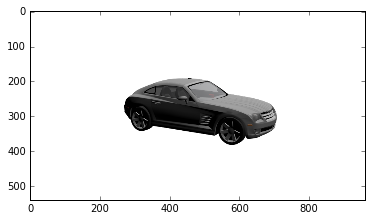

In [9]:
plotOpenCVImage(blender_img)

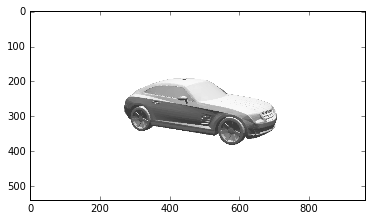

In [10]:
plotOpenCVImage(cutegl_img)

In [11]:
blender_mask = blender_img[:,:,3].astype(bool)
cutegl_mask = cutegl_img[:,:,3].astype(bool)

Num of diffferent pixels = 780
0
255


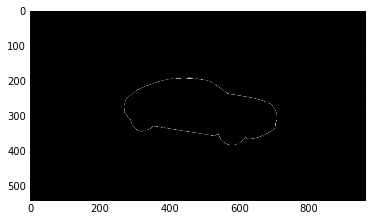

In [12]:
diff = np.absolute((blender_mask.astype(int) - cutegl_mask.astype(int)))

print 'Num of diffferent pixels = {}'.format(diff.sum())

diff *= 255
print diff.min()
print diff.max()

plt.imshow(diff.astype(np.uint8), cmap = 'gray', interpolation = 'bicubic')

In [13]:
d2_img = cv2.imread('../build/render4cnn_d2.png',cv2.IMREAD_UNCHANGED)
d4_img = cv2.imread('../build/render4cnn_d4.png',cv2.IMREAD_UNCHANGED)

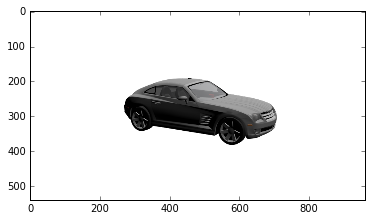

In [15]:
plotOpenCVImage(d2_img)


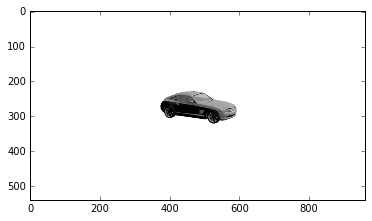

In [16]:
plotOpenCVImage(d4_img)

In [21]:
d2_bbx = getTightBBox(d2_img)
d4_bbx = getTightBBox(d4_img)
print 'd2_bbx = ', d2_bbx
print 'd4_bbx = ', d4_bbx

d2_bbx =  BoundingBox(cx=487.0, cy=288.0, w=438, h=192)
d4_bbx =  BoundingBox(cx=481.5, cy=276.5, w=219, h=93)


In [23]:
d2_crop_img = cropImage(d2_img, d2_bbx)
d4_crop_img = cropImage(d4_img, d4_bbx)

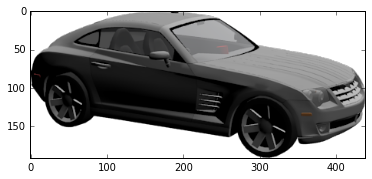

In [24]:
plotOpenCVImage(d2_crop_img)

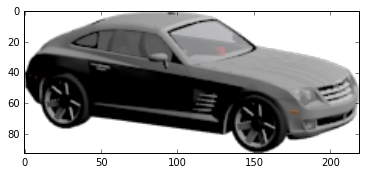

In [25]:
plotOpenCVImage(d4_crop_img)

Num of diffferent pixels = 1498
0
255


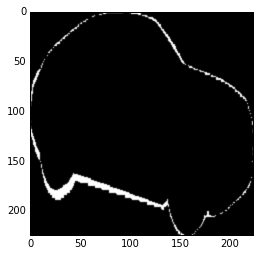

In [26]:
d2_crop_img_mask = cv2.resize(d2_crop_img, (224, 224))[:,:,3].astype(bool)
d4_crop_img_mask = cv2.resize(d4_crop_img, (224, 224))[:,:,3].astype(bool)
diff = np.absolute((d2_crop_img_mask.astype(int) - d4_crop_img_mask.astype(int)))

print 'Num of diffferent pixels = {}'.format(diff.sum())

diff *= 255
plt.imshow(diff.astype(np.uint8), cmap = 'gray', interpolation = 'bicubic')

In [27]:
cutegl_crop = cv2.imread('../build/model_d2_cropped.png',cv2.IMREAD_UNCHANGED)
manual_crop = cv2.imread('../build/d_crop_img.png',cv2.IMREAD_UNCHANGED)

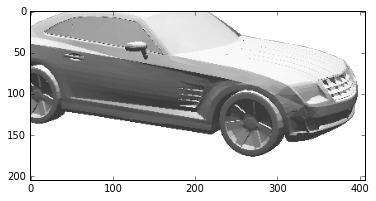

In [28]:
plotOpenCVImage(cutegl_crop)

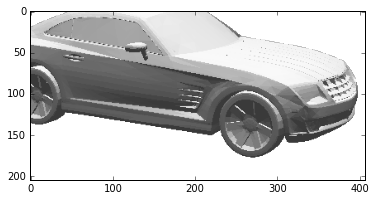

In [29]:
plotOpenCVImage(manual_crop)

Num of diffferent pixels = 375
0
255


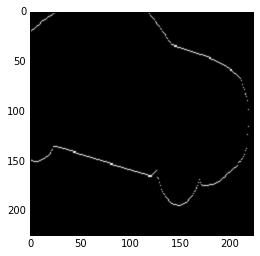

In [30]:
cutegl_crop_mask = cv2.resize(cutegl_crop, (224, 224))[:,:,3].astype(bool)
manual_crop_mask = cv2.resize(manual_crop, (224, 224))[:,:,3].astype(bool)
diff = np.absolute((cutegl_crop_mask.astype(int) - manual_crop_mask.astype(int)))

print 'Num of diffferent pixels = {}'.format(diff.sum())

diff *= 255
plt.imshow(diff.astype(np.uint8), cmap = 'gray', interpolation = 'bicubic')